<a href="https://colab.research.google.com/github/Arwa925/Assignment2_AIPlatform/blob/main/Assignment2_AI_platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#  Import Libraries
import torch as t
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [46]:
#  Data Loading & Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = t.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = t.utils.data.DataLoader(testset, batch_size=64, shuffle=False)



In [47]:
# Build Model (similar to MNIST example, but with different layer sizes)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

print(net)




Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


In [48]:
#  Define Loss & Optimizer (same as section)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [49]:
#  Train Model
epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    net.train()
    correct, total, running_loss = 0, 0, 0.0

    for data in train_loader:
        x, y = data
        optimizer.zero_grad()
        outputs = net(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = t.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

    train_acc = correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_acc)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader):.4f} - Accuracy: {train_acc*100:.2f}%")





Epoch 1/10 - Loss: 0.4928 - Accuracy: 81.96%
Epoch 2/10 - Loss: 0.3658 - Accuracy: 86.48%
Epoch 3/10 - Loss: 0.3273 - Accuracy: 87.88%
Epoch 4/10 - Loss: 0.3032 - Accuracy: 88.73%
Epoch 5/10 - Loss: 0.2820 - Accuracy: 89.44%
Epoch 6/10 - Loss: 0.2681 - Accuracy: 90.00%
Epoch 7/10 - Loss: 0.2532 - Accuracy: 90.46%
Epoch 8/10 - Loss: 0.2420 - Accuracy: 90.96%
Epoch 9/10 - Loss: 0.2296 - Accuracy: 91.40%
Epoch 10/10 - Loss: 0.2185 - Accuracy: 91.65%


In [50]:
#  Evaluate on Test Set
net.eval()
correct, total = 0, 0
all_preds, all_labels = [], []

with t.no_grad():
    for data in test_loader:
        x, y = data
        outputs = net(x)
        _, predicted = t.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y.cpu().numpy())

test_accuracy = correct / total
print(f"\n Final Test Accuracy: {test_accuracy*100:.2f}%")


 Final Test Accuracy: 88.20%


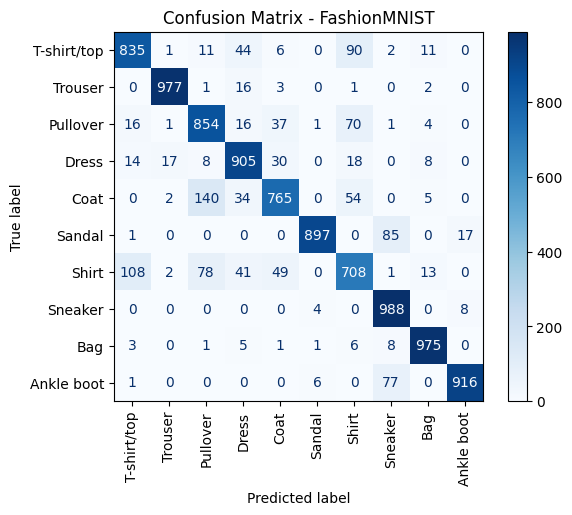

In [51]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=trainset.classes)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix - FashionMNIST")
plt.show()

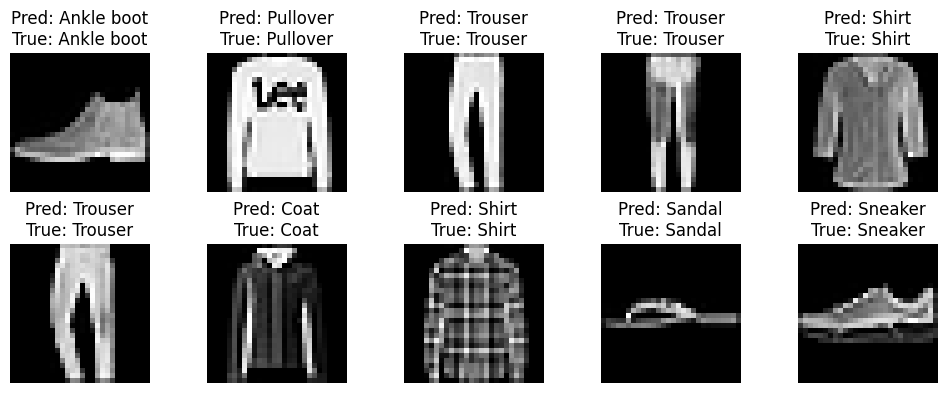

In [52]:
#  Visualize Some Predictions
fig, axes = plt.subplots(2, 5, figsize=(10,4))
net.eval()
images, labels = next(iter(test_loader))
outputs = net(images)
_, preds = t.max(outputs, 1)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i][0], cmap='gray')
    ax.set_title(f"Pred: {trainset.classes[preds[i]]}\nTrue: {trainset.classes[labels[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

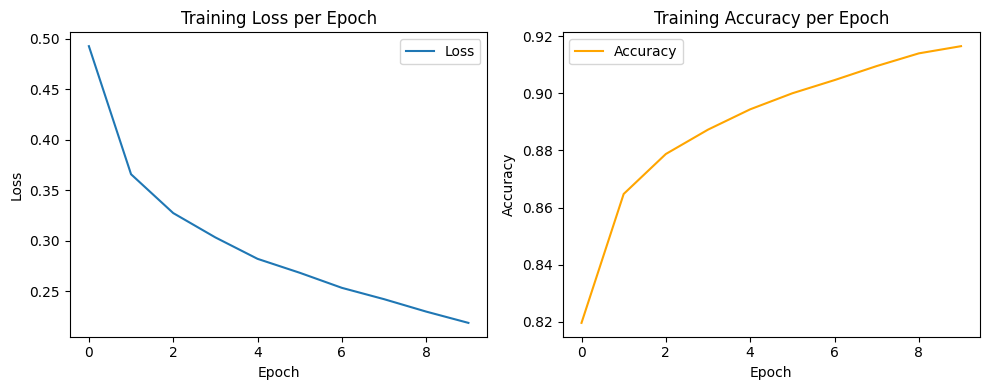

In [53]:
#  Visualize Training Loss & Accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Loss')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Accuracy', color='orange')
plt.title("Training Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [54]:
print("\n Conclusion:")
print(f"- Final Training Accuracy: {train_accuracies[-1]*100:.2f}%")
print(f"- Final Test Accuracy: {test_accuracy*100:.2f}%")
print("- Model performed well on Fashion-MNIST with a simple feedforward architecture.")
print("- Accuracy >85% shows it successfully learned clothing categories.")
print("- Some confusion occurs between similar classes like Shirt and T-shirt/top.")



 Conclusion:
- Final Training Accuracy: 91.65%
- Final Test Accuracy: 88.20%
- Model performed well on Fashion-MNIST with a simple feedforward architecture.
- Accuracy >85% shows it successfully learned clothing categories.
- Some confusion occurs between similar classes like Shirt and T-shirt/top.
